In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import enchant
import re

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Import Data
df = pd.read_csv('data/articles.csv', index_col='index')

In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
df.tail()

,title,url,date,tags,words,content
index,,,,,,
5694,"Immunity, Interdependence, and the Shared Root...",https://www.brainpickings.org/2021/03/19/eula-...,2021-03-19,"philosophy, science, books, eula-biss, culture...",1897,Months after Rachel Carson’s Silent Spring ...
5695,"Of Trees, Tenderness, and the Moon: Hasui Kawa...",https://www.brainpickings.org/2021/03/22/hasui...,2021-03-22,"hasui-kawase, culture, art, trees, japan,",817,“After you have exhausted what there is in bus...
5696,Our Greatest Misunderstanding About Love: Phil...,https://www.brainpickings.org/2021/03/23/esthe...,2021-03-23,"philosophy, esther-perel, love, culture, anima...",423,In his revelatory 1956 classic The Art of Lov...
5697,Secrets from the Center of the World: Poet Joy...,https://www.brainpickings.org/2021/03/25/secre...,2021-03-25,"joy-harjo, science, books, stephen-strom, cult...",1165,“Place and a mind may interpenetrate till the ...
5698,Seeking an Aurora: A Wondrous Illustrated Cele...,https://www.brainpickings.org/2021/03/28/seeki...,2021-03-28,"science, books, space, culture, art, illustrat...",692,"In 1621, already questioning his life in the p..."


In [8]:
word_count = sum(df["words"])
art_count = len(df["title"])
#print(df.date[-1:] - df.date[1])
print("Maria Popova has published " + str(word_count) + " words & " + str(art_count) + " articles!")
print("The average article length is " + str(int(word_count/art_count)) + " words.")
print("The articles span " + str(round(4959/365.25, 1)) + " years.")
print("Over that time, she has published an article every " + str(round(4959*24/art_count)) + " hours!")

Maria Popova has published 5084198 words & 5698 articles!
The average article length is 892 words.
The articles span 13.6 years.
Over that time, she has published an article every 21 hours!


King James Bible: 783,137 words

In Search of Lost Time (7 vols.): 1.27 million words

Game of Thrones (5 vols.): 1.74 million

Outlander series (8 vols.): 3.17 million words (7,533 pages)

In [9]:
#Outlander
283910 + 338430 + 380770 + 390050 + 482850 + 502860 + 400055 + 391500

3170425

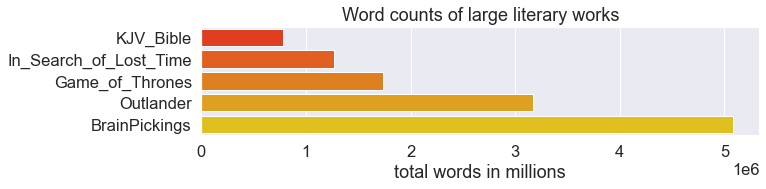

In [44]:
palette = "autumn"
f, ax = plt.subplots(figsize=(10, 2))
words = dict(KJV_Bible=783000, In_Search_of_Lost_Time=1270000,
             Game_of_Thrones=1740000, Outlander=3170000, BrainPickings=5080000)
ax =sns.barplot(y=list(words.keys()), x=list(words.values()), palette=palette)
ax.set(xlabel='total words in millions', title="Word counts of large literary works");

[Text(0.5, 0, 'word count'), Text(0.5, 1.0, 'Article word count histogram')]

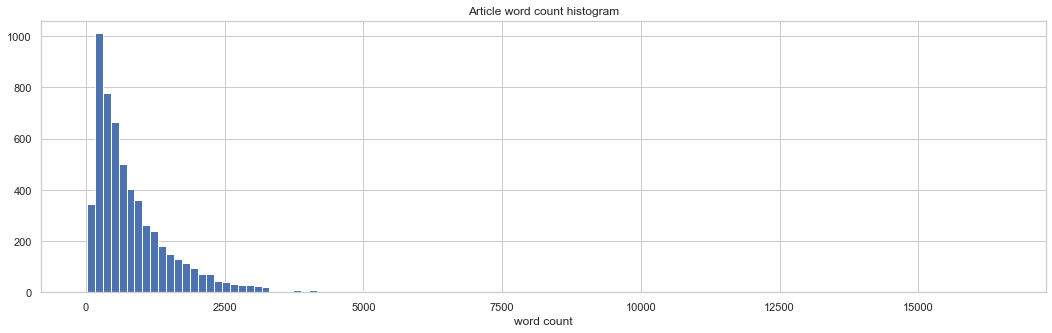

In [41]:
sns.set_theme(style="whitegrid") #use!
f, ax = plt.subplots(figsize=(18, 5))
df.words.hist(bins=115)
ax.set(xlabel='word count', title="Article word count histogram")

In [12]:
year_article_counts = df.date.groupby(df.date.dt.year).agg("count")
year_article_counts

date
2007     21
2008    130
2009    263
2010    396
2011    754
2012    760
2013    745
2014    702
2015    549
2016    489
2017    258
2018    230
2019    197
2020    167
2021     37
Name: date, dtype: int64

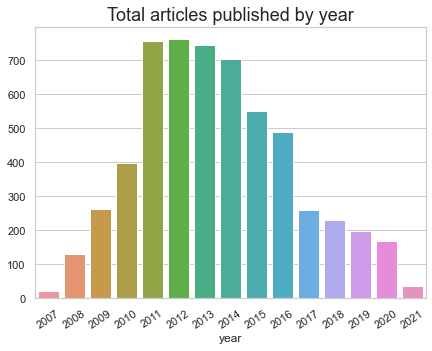

In [42]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 5))
sns.set(font_scale=1.5)
#ax = sns.barplot(x=year_word_counts.index, y=year_word_counts.values)
ax = sns.barplot(x=year_article_counts.index,y=year_article_counts.values)
ax.set(xlabel='year', title="Total articles published by year")
plt.xticks(rotation=34);

Complete this visual with stacked bars indicating tags.

In [14]:
year_word_counts = df.words.groupby(df.date.dt.year).agg("sum")
year_word_counts

date
2007     30893
2008     67598
2009     95319
2010    140938
2011    336249
2012    505655
2013    761746
2014    855349
2015    664427
2016    587429
2017    306642
2018    262590
2019    252131
2020    173273
2021     43959
Name: words, dtype: int64

In [46]:
#through 2014
sum(year_word_counts[:8])

2793747

In [49]:
#after 2014
sum(year_word_counts[8:])

2290451

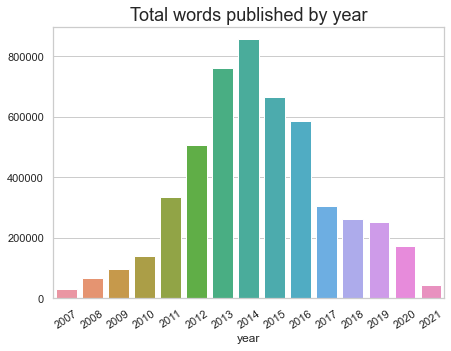

In [43]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 5))
sns.set(font_scale=1.5)
ax = sns.barplot(x=year_word_counts.index,
                 y=year_word_counts.values)
ax.set(xlabel='year', title="Total words published by year")
plt.xticks(rotation=34);

In [17]:
science = []
for ix, tag in enumerate(df.tags):
    if re.match(".*science,.*", tag): science.append(ix)
sci_ser = df.iloc[science].date.groupby(df.date.dt.year).agg("count")

poetry = []
for ix, tag in enumerate(df.tags):
    if re.match(".*poetry,.*", tag): poetry.append(ix)
poe_ser = df.iloc[poetry].date.groupby(df.date.dt.year).agg("count")

love = []
for ix, tag in enumerate(df.tags):
    if re.match(".*love,.*", tag): love.append(ix)
lov_ser = df.iloc[love].date.groupby(df.date.dt.year).agg("count")

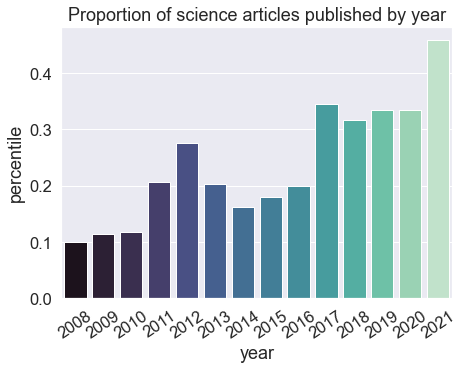

In [18]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x=sci_ser.index,y=sci_ser/year_article_counts[1:].values, palette="mako")
ax.set(xlabel='year', ylabel='percentile', title="Proportion of science articles published by year")
plt.xticks(rotation=34);

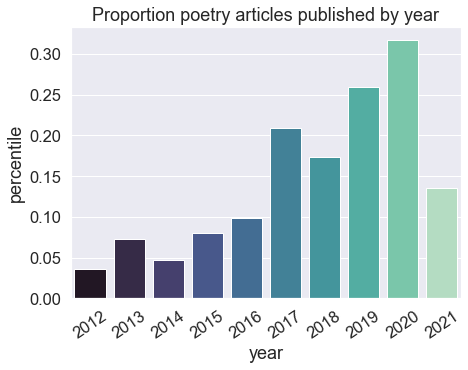

In [19]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x=poe_ser.index,y=poe_ser/year_article_counts[5:].values, palette="mako")
ax.set(xlabel='year', ylabel='percentile', title="Proportion poetry articles published by year")
plt.xticks(rotation=34);

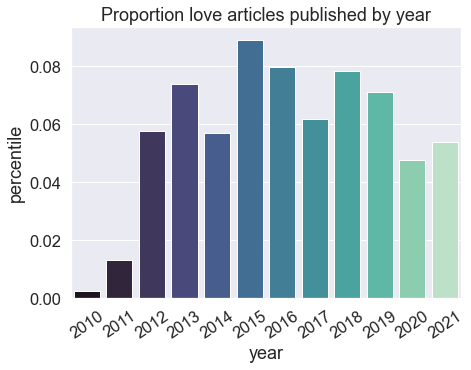

In [20]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x=lov_ser.index,y=lov_ser/year_article_counts[3:].values, palette="mako")
ax.set(xlabel='year', ylabel='percentile', title="Proportion love articles published by year")
plt.xticks(rotation=34);

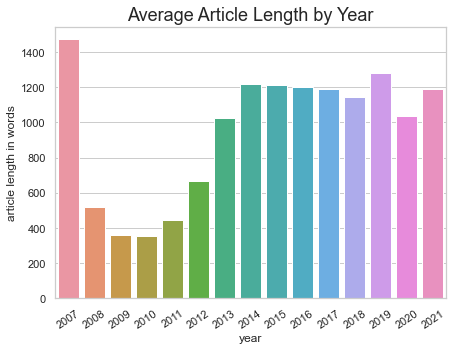

In [21]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 5))
sns.set(font_scale=1.5)
year_article_length = round(year_word_counts/year_article_counts)
ax = sns.barplot(x=year_article_length.index,
                 y=year_article_length.values)
ax.set(xlabel='year', ylabel='article length in words', title="Average Article Length by Year")
plt.xticks(rotation=34);

In [22]:
#create a tag dictionary
tags = str()
for tag in df.tags: tags += tag
tag_dict = dict()
for tag in tags.split():
    tag = tag.replace(",","")
    if tag in tag_dict:
        tag_dict[tag] += 1
    else:
        tag_dict[tag] = 1

In [23]:
from heapq import nlargest
#top 22 tags
N=22
res = nlargest(N, tag_dict, key=tag_dict.get)
top_tags = dict()
for r in res:
    top_tags[r] = tag_dict[r]
del top_tags['culture'] #too common to be useful
del top_tags['books']
del top_tags['picked']

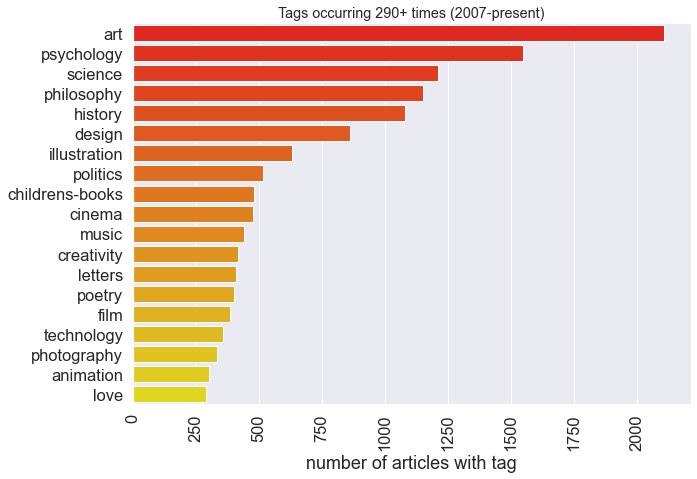

In [24]:
f, ax = plt.subplots(figsize=(10, 7))
sns.set(font_scale=1.2)
ax =sns.barplot(y=list(top_tags.keys()),
                x=list(top_tags.values()), palette=palette)
ax.set(xlabel='number of articles with tag', title="Tags occurring 290+ times (2007-present)");
plt.xticks(rotation=90);

In [25]:
documents = df.content

In [26]:
#Enchant is an English dictionary
vocab_enchant = list()
d = enchant.Dict("en_US")
#if a word in the corpus is in the enchant dictionary, it is included
for word in vocabulary:
    if d.check(word):
        vocab_enchant.append(word)
len(vocab_enchant)

NameError: name 'vocabulary' is not defined

In [ ]:
vocab_lemmatized = list()
lemmatizer = WordNetLemmatizer()
#Lemmatization is the process of grouping together the different inflected forms of a word
for word in vocab_enchant:
    vocab_lemmatized.append(lemmatizer.lemmatize(word))
    
vocab_lemmatized = sorted(list(set(vocab_lemmatized)))
vocab_str = str()
for word in vocab_lemmatized:
    vocab_str += word + ", "
#this is a good estimate of Maria Popova's working vocabulary
#her true vocabulary is probably double this
len(vocab_lemmatized)

In [ ]:
#wordy mcwordiness 35,000
vocab_str

In [ ]:
documents[666]